# Titanic Survival Analysis & Prediction


## Introduction

> In this project, we analyze the Titanic dataset to understand patterns in survival and build a simple machine learning model to predict survival based on passenger attributes such as class, sex, age, and family size.

### 1. Load Data

> We start by loading the dataset to inspect the first few rows and understand the structure.

In [1]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Data Exploration Analysis (EDA)

> We start by examining the dataset for missing values. This helps us understand which columns need cleaning or imputation before analysis. For instance, the Age column has some missing values, while the Cabin column has many missing entries and will not be used in this simple analysis.

In [2]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Since the Age column has missing values, we replace them with the mean age using **SimpleImputer**.

In [ ]:
from sklearn.impute import SimpleImputer

# Fills missing numerical values with mean 
num_cols = df.select_dtypes(include="number").columns
imputer = SimpleImputer(strategy="mean")
df[num_cols] = imputer.fit_transform(df[num_cols])


> Next, we explore key features like Sex, Pclass, SibSp, and Age to understand their distribution and relevance for predicting survival.

In [7]:
df["Age"].max()

80.0

In [9]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
df["Pclass"].unique()


array([3., 1., 2.])

#### Survival by Sex

> Gender had a significant effect on survival. We encode Sex numerically and calculate survival rates for males and females.

In [11]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df["Sex_encoded"] = lb.fit_transform(df["Sex"])

lb.classes_


array(['female', 'male'], dtype=object)

In [28]:
female_mean = df[df["Sex_encoded"] == 0]["Survived"].mean()
print(f"Average Women Survived: {female_mean * 100:.1f}%")

female_mean2 = (df[df["Sex_encoded"] == 0]["Survived"] == 0).mean()
print(f"\nAverage Women Non-Survived: {female_mean2 * 100:.1f}%")

male_mean = df[df["Sex_encoded"] == 1]["Survived"].mean()
print(f"\nAverage Men Survived: {male_mean * 100:.1f}%")

male_mean2 = (df[df["Sex_encoded"] == 1]["Survived"] == 0).mean()
print(f"\nAverage Men Non-Survived: {male_mean2 * 100:.1f}%")


Average Women Survived: 74.2%

Average Women Non-Survived: 25.8%

Average Men Survived: 18.9%

Average Men Non-Survived: 81.1%


> Visualizing survival by gender:


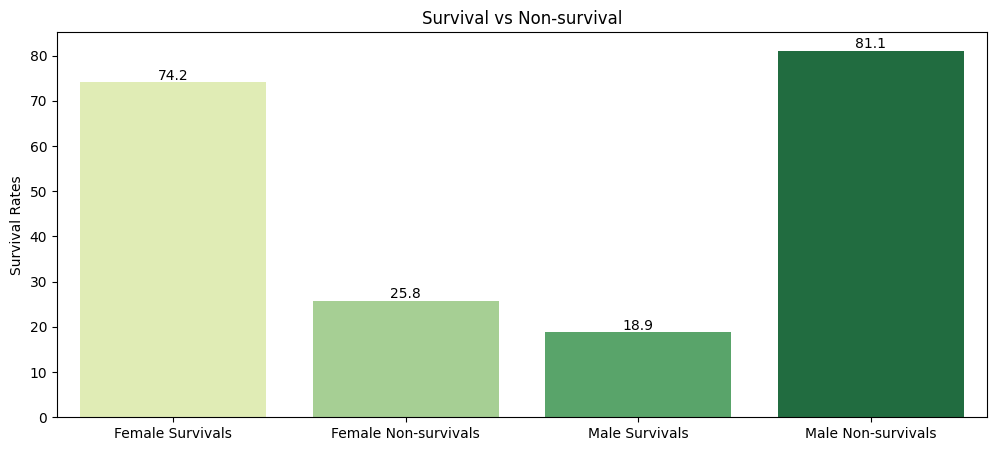

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns 

labels = ["Female Survivals", "Female Non-survivals", "Male Survivals", "Male Non-survivals"]
rates = [female_mean*100,female_mean2*100, male_mean*100, male_mean2*100]

plt.figure(figsize=(12, 5))
sns.barplot(x=labels, y=rates, hue=labels, palette="YlGn")

for i in range(len(labels)):
    plt.text(i, rates[i] + 0.5, f"{rates[i]:.1f}", ha='center')

    
plt.title("Survival vs Non-survival")
plt.ylabel("Survival Rates")
plt.show()


#### Survival by Class

> Passenger class also affected survival rates, with first-class passengers having higher chances of survival.

In [29]:
class1 = df[df["Pclass"] == 1]["Survived"].mean()
print(f"Average Class 1 Survived: {class1 * 100:.1f}%")

class1_2 = (df[df["Pclass"] == 1]["Survived"] == 0).mean()
print(f"\nAverage Class 1 Non-Survived: {class1_2 * 100:.1f}%")

class2 = df[df["Pclass"] == 2]["Survived"].mean()
print(f"\nAverage Class 2 Survived: {class2 * 100:.1f}%")

class2_2 = (df[df["Pclass"] == 2]["Survived"] == 0).mean()
print(f"\nAverage Class 2 Non-Survived: {class2_2 * 100:.1f}%")

class3 =df[df["Pclass"] == 3]["Survived"].mean()
print(f"\nAverage Class 3 Survived: {class3 * 100:.1f}%")

class3_3 = (df[df["Pclass"] == 3]["Survived"] == 0).mean()
print(f"\nAverage Class 3 Non-Survived: {class3_3 * 100:.1f}%")

Average Class 1 Survived: 63.0%

Average Class 1 Non-Survived: 37.0%

Average Class 2 Survived: 47.3%

Average Class 2 Non-Survived: 52.7%

Average Class 3 Survived: 24.2%

Average Class 3 Non-Survived: 75.8%


> Visualizing survival by passenger class:

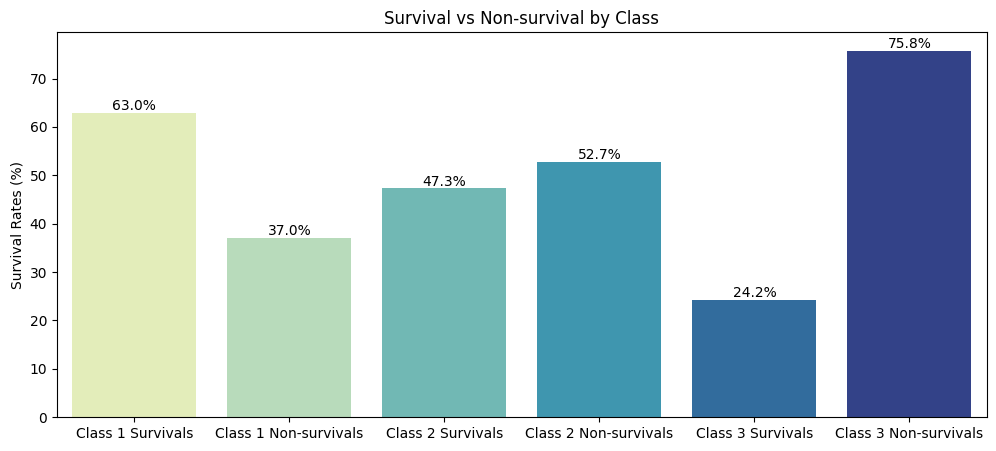

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns 

labels2 = ["Class 1 Survivals", "Class 1 Non-survivals", "Class 2 Survivals", "Class 2 Non-survivals", "Class 3 Survivals", "Class 3 Non-survivals"]
rates2 = [class1*100, class1_2*100, class2*100, class2_2*100, class3*100, class3_3*100]

plt.figure(figsize=(12, 5))
sns.barplot(x=labels2, y=rates2, hue=labels2, palette="YlGnBu")

for i in range(len(labels2)):
    plt.text(i, rates2[i] * 1.0, f"{rates2[i]:.1f}%", ha='center', va='bottom')

plt.title("Survival vs Non-survival by Class")
plt.ylabel("Survival Rates (%)")
plt.show()

#### Survival by Age

In [30]:
age_mean = df[df["Survived"] == 1]["Age"].mean()
print(f"\nAverage Age Survived: {age_mean:.1f}")

age_mean2 = df[df["Survived"] == 0]["Age"].mean()
print(f"\nAverage Age Non-Survived: {age_mean2:.1f}")


Average Age Survived: 28.5

Average Age Non-Survived: 30.4


> Visualizing survival by age:

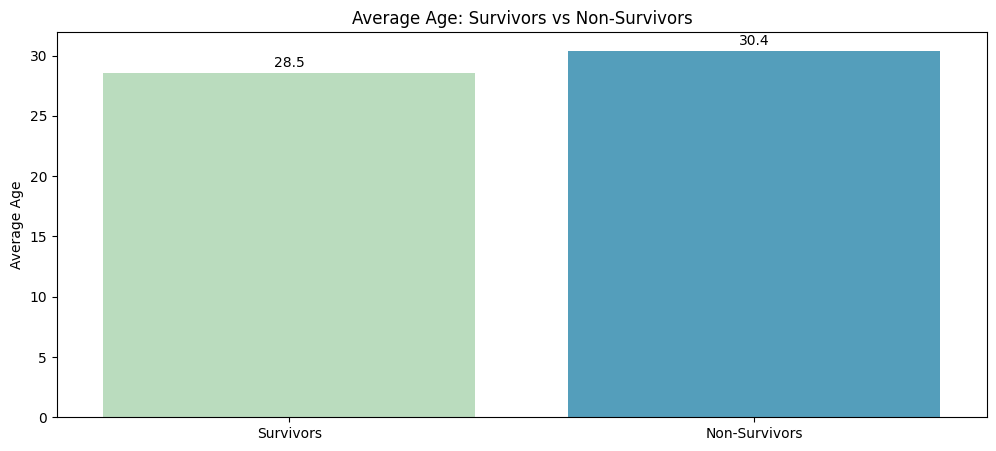

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

labels3 = ["Survivors", "Non-Survivors"]
rates3 = [age_mean, age_mean2]

plt.figure(figsize=(12, 5))
sns.barplot(x=labels3, y=rates3, hue=labels3, palette="GnBu")

for i in range(len(labels3)):
    plt.text(i, rates3[i] + 0.5, f"{rates3[i]:.1f}", ha='center')

plt.title("Average Age: Survivors vs Non-Survivors")
plt.ylabel("Average Age")
plt.show()


### 3. Predicting Survival Using a Model

> After exploring the data, we build a simple Logistic Regression model to predict survival based on the features we examined: Pclass, Sex, Age, SibSp, and Parch.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

X = df[["Pclass", "Sex_encoded", "Age", "SibSp", "Parch"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nF1 Score:, {f1_score(y_test, y_pred):.3f}")



Accuracy: 0.827

Confusion Matrix:
 [[93 12]
 [19 55]]

F1 Score:, 0.780


> The model achieved an accuracy of 0.827, which means it correctly predicted about 83% of the survival outcomes. The confusion matrix shows how many survivors and non-survivors were correctly predicted, as well as the number of incorrect predictions. Finally, the F1 score of 0.780 indicates a good balance between precision and recall, meaning the model does a reasonably good job at identifying both survivors and non-survivors.
